# ISLP - Chapter 3 - Exercise 13
### Author: pzuehlke

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

__13 (a):__ 

In [35]:
rng = np.random.default_rng(1)
x = rng.normal(size=100)

__13 (b):__ 

In [36]:
eps = rng.normal(0, 0.25, size=100)

__13 (c):__ The length of $ \mathbf{y} $ is the same as that of $ \mathbf{x} $
and $ \mathbf{\varepsilon} $, namely, $ 100 $. The values of $ \beta_0 $ and $
\beta_1 $ are $ \beta_0 = -1 $ and $ \beta_1 = 0.5 $.

In [37]:
y = -1 + 0.5 * x + eps
print(y.shape[0])  # number of coordinates

100


__13 (d):__

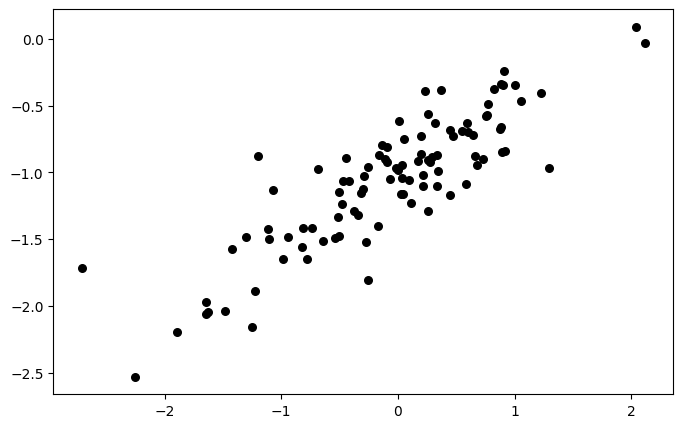

In [38]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.scatter(x, y, color="black", s=30);

__13 (e):__ By fitting a least squares line through $ \mathbf{x} $ and $ \mathbf{y} $ we obtain the estimates
$$
\hat{\beta}_0 = -1.0190 \quad \text{and} \quad \hat{\beta}_1 = 0.4921\,.
$$
The true values are $ \beta_0 = -1 $ and $ \beta_1 = 0.5 $.

In [39]:
X = sm.add_constant(x)
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     280.0
Date:                Wed, 05 Feb 2025   Prob (F-statistic):           1.74e-30
Time:                        13:32:41   Log-Likelihood:                -2.4306
No. Observations:                 100   AIC:                             8.861
Df Residuals:                      98   BIC:                             14.07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.0190      0.025    -40.537      0.000      -1.069      -0.969
x1             0.4921      0.029     16.734      0.000       0.434       0.551
==============================================================================
Omnibus:                        1.277   Durbin-Watson:                   2.198
Prob(Omnibus):                  0.528   Jarque-Bera (JB):                0.759
Skew:                           0.114   Prob(JB):                        0.684
Kurtosis:                       3.361   Cond. No.                         1.20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

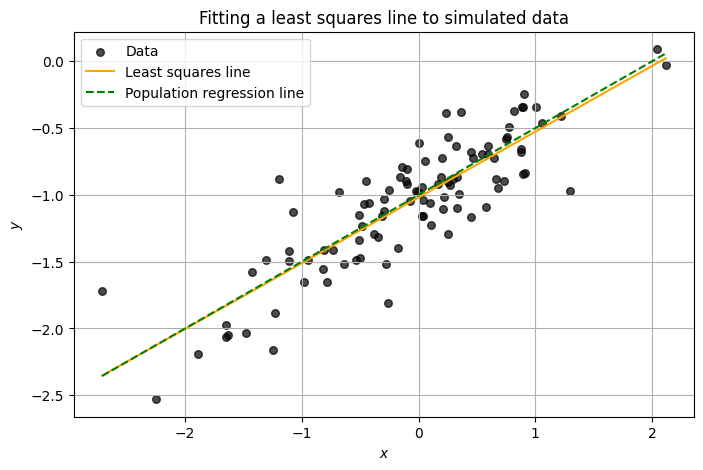

In [47]:
intercept, slope = model.params

x_ls_line = np.linspace(min(x), max(x), 101)
y_ls_line = intercept + slope * x_ls_line
x_reg_line = np.linspace(min(x), max(x), 101)
y_reg_line = -1 + 0.5 * x_reg_line

fig, ax = plt.subplots(figsize=(8, 5))
ax.scatter(x, y, color="black", s=30, alpha=0.7, label="Data")
ax.plot(x_ls_line, y_ls_line, color="orange", label="Least squares line")
ax.plot(x_reg_line, y_reg_line, color="green", ls="dashed", label="Population regression line")

ax.set_xlabel("$ x $")
ax.set_ylabel("$ y $")
ax.set_title("Fitting a least squares line to simulated data")
ax.grid(True)
ax.legend();

__13 (g):__ The $ p $-value for the hypothesis that the coefficient of the
square term is zero is terrible ($ 9.959 $), and the adjusted $ R^2 $ actually
goes down when this term is added ($ 0.738 $ versus $ 0.735 $). Hence there
is no evidence that the quadratic term improves the model fit.

In [50]:
X = np.column_stack((x, x**2))
X = sm.add_constant(X)  # Add intercept
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     138.6
Date:                Wed, 05 Feb 2025   Prob (F-statistic):           3.66e-29
Time:                        14:32:20   Log-Likelihood:                -2.4293
No. Observations:                 100   AIC:                             10.86
Df Residuals:                      97   BIC:                             18.67
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.0182      0.030    -34.186      0.0

In [51]:
intercept, coef_x, coef_x2 = model.params
print(f"intercept: {intercept}, coefficient of x: {coef_x}, coefficient of x^2: {coef_x2}")

intercept: -1.01818882269493, coefficient of x: 0.49156818987416184, coefficient of x^2: -0.001177253955177933


__13 (h):__ 

In [53]:
rng = np.random.default_rng(1)
x = rng.normal(size=100)
eps = rng.normal(0, 0.05, size=100)  # reduced variance
y = -1 + 0.5 * x + eps

X = sm.add_constant(x)
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     7181.
Date:                Wed, 05 Feb 2025   Prob (F-statistic):           1.73e-93
Time:                        14:37:36   Log-Likelihood:                 158.51
No. Observations:                 100   AIC:                            -313.0
Df Residuals:                      98   BIC:                            -307.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.0038      0.005   -199.662      0.000      -1.014      -0.994
x1             0.4984      0.006     84.739      0.000       0.487       0.510
==============================================================================
Omnibus:                        1.277   Durbin-Watson:                   2.198
Prob(Omnibus):                  0.528   Jarque-Bera (JB):                0.759
Skew:                           0.114   Prob(JB):                        0.684
Kurtosis:                       3.361   Cond. No.                         1.20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

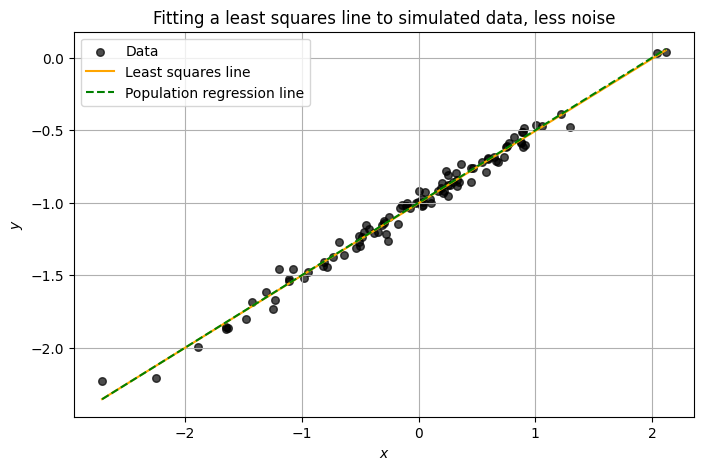

In [55]:
intercept, slope = model.params

x_ls_line = np.linspace(min(x), max(x), 101)
y_ls_line = intercept + slope * x_ls_line
x_reg_line = np.linspace(min(x), max(x), 101)
y_reg_line = -1 + 0.5 * x_reg_line

fig, ax = plt.subplots(figsize=(8, 5))
ax.scatter(x, y, color="black", s=30, alpha=0.7, label="Data")
ax.plot(x_ls_line, y_ls_line, color="orange", label="Least squares line")
ax.plot(x_reg_line, y_reg_line, color="green", ls="dashed", label="Population regression line")

ax.set_xlabel("$ x $")
ax.set_ylabel("$ y $")
ax.set_title("Fitting a least squares line to simulated data, less noise")
ax.grid(True)
ax.legend();

In [57]:
X = np.column_stack((x, x**2))
X = sm.add_constant(X)  # Add intercept
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     3554.
Date:                Wed, 05 Feb 2025   Prob (F-statistic):           1.84e-91
Time:                        14:38:23   Log-Likelihood:                 158.51
No. Observations:                 100   AIC:                            -311.0
Df Residuals:                      97   BIC:                            -303.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.0036      0.006   -168.489      0.0

__13 (i):__ With noisier data ($ \text{Var}(\varepsilon) = \sqrt{2} $), the $ p
$-value for the linear coefficient becomes higher (goes from $ 0.000 $ to $ 0.090
$, which is above the $ 5\% $ threshold). The quadratic term remains clearly statistically insignificant.

In [64]:
rng = np.random.default_rng(1)
x = rng.normal(size=100)
eps = rng.normal(0, 2, size=100)  # large variance
y = -1 + 0.5 * x + eps

X = sm.add_constant(x)
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     3.452
Date:                Wed, 05 Feb 2025   Prob (F-statistic):             0.0662
Time:                        14:41:55   Log-Likelihood:                -210.37
No. Observations:                 100   AIC:                             424.7
Df Residuals:                      98   BIC:                             430.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.1521      0.201     -5.729      0.000      -1.551      -0.753
x1             0.4372      0.235      1.858      0.066      -0.030       0.904
==============================================================================
Omnibus:                        1.277   Durbin-Watson:                   2.198
Prob(Omnibus):                  0.528   Jarque-Bera (JB):                0.759
Skew:                           0.114   Prob(JB):                        0.684
Kurtosis:                       3.361   Cond. No.                         1.20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

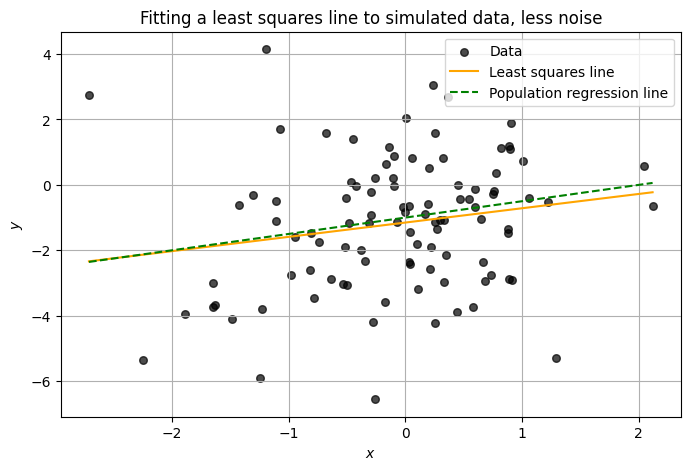

In [65]:
intercept, slope = model.params

x_ls_line = np.linspace(min(x), max(x), 101)
y_ls_line = intercept + slope * x_ls_line
x_reg_line = np.linspace(min(x), max(x), 101)
y_reg_line = -1 + 0.5 * x_reg_line

fig, ax = plt.subplots(figsize=(8, 5))
ax.scatter(x, y, color="black", s=30, alpha=0.7, label="Data")
ax.plot(x_ls_line, y_ls_line, color="orange", label="Least squares line")
ax.plot(x_reg_line, y_reg_line, color="green", ls="dashed", label="Population regression line")

ax.set_xlabel("$ x $")
ax.set_ylabel("$ y $")
ax.set_title("Fitting a least squares line to simulated data, less noise")
ax.grid(True)
ax.legend();

In [68]:
# Now let's fit a degree-2 polynomial:
X = np.column_stack((x, x**2))
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     1.710
Date:                Wed, 05 Feb 2025   Prob (F-statistic):              0.186
Time:                        14:42:18   Log-Likelihood:                -210.37
No. Observations:                 100   AIC:                             426.7
Df Residuals:                      97   BIC:                             434.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.1455      0.238     -4.808      0.0

__13 (j):__ The $ 95\% $ prediction intervals for $ \hat{\beta}_0 $ and $
\hat{\beta}_1 $ are as follows:
* Moderate noisiness (original example): $ [-1.069, -0.969] $ and $ [0.434, 0.551] $, respectively.
* Less noisy data: $ [-1.014, -0.994] $ and $ [0.487, 0.510] $, respectively.
* Noisier data: $ [-1.551, -0.753] $ and $ [-0.030, 0.904] $, respectively.

Clearly, the less noise, the tighter the prediction intervals.